<a href="https://colab.research.google.com/github/AdeelAhmed2001/deep-learning-assignments/blob/main/Ionosphere_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers




In [2]:
ionosphere_data=pd.read_csv("ionosphere_data.csv")
display(ionosphere_data.head(n=5))

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
ionosphere_data.shape


(351, 35)

In [4]:
ionosphere_data.ndim


2

In [5]:
ionosphere_data["feature1"]

0      1
1      1
2      1
3      1
4      1
      ..
346    1
347    1
348    1
349    1
350    1
Name: feature1, Length: 351, dtype: int64

In [6]:
ionosphere_data.iloc[23]

feature1     0
feature2     0
feature3    -1
feature4     1
feature5     0
feature6     0
feature7     0
feature8     0
feature9    -1
feature10    1
feature11    1
feature12    1
feature13    0
feature14    0
feature15    0
feature16    0
feature17    1
feature18   -1
feature19   -1
feature20    1
feature21    1
feature22    1
feature23    0
feature24    0
feature25   -1
feature26   -1
feature27    1
feature28   -1
feature29    1
feature30    1
feature31   -1
feature32    1
feature33    0
feature34    0
label        b
Name: 23, dtype: object

In [7]:
ionosphere_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [8]:
pd.isnull(ionosphere_data).sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
ionosphere_data["label"]=labelencoder.fit_transform(ionosphere_data["label"])


In [11]:
ionosphere_data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [12]:
x=ionosphere_data.loc[0:,"feature1":"feature34"]
y=ionosphere_data.loc[0:,"label"]


In [13]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels=train_test_split(x,y,test_size=0.40,random_state=69)

In [14]:
train_data=np.asarray(train_data)
test_data=np.asarray(test_data)

In [15]:
train_data[33]

array([ 1.     ,  0.     ,  1.     ,  0.09802,  1.     ,  0.25101,
        0.9839 ,  0.33044,  0.80365,  0.5302 ,  0.74977,  0.60297,
        0.56937,  0.71942,  0.55311,  0.74079,  0.29452,  0.82193,
        0.21137,  0.79777,  0.09709,  0.82162, -0.01734,  0.7987 ,
       -0.15144,  0.75596, -0.22839,  0.69187, -0.31713,  0.60948,
       -0.40291,  0.54522, -0.42815,  0.44534])

In [16]:
train_labels=np.asarray(train_labels).astype("float32")
test_labels=np.asarray(test_labels).astype("float32")

In [17]:
ionosphere_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(34,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history=model.fit(train_data,train_labels,epochs=60)

Epoch 1/60
7/7 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5478
Epoch 2/60
7/7 [==============================] - 0s 3ms/step - loss: 0.5956 - accuracy: 0.8122
Epoch 3/60
7/7 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7548
Epoch 4/60
7/7 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7723
Epoch 5/60
7/7 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.8018
Epoch 6/60
7/7 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7728
Epoch 7/60
7/7 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7916
Epoch 8/60
7/7 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7590
Epoch 9/60
7/7 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.8150
Epoch 10/60
7/7 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.7886
Epoch 11/60
7/7 [======================

In [21]:
test_loss,test_acc=model.evaluate(test_data,test_labels)
print("test_loss:",test_loss,"test_accuracy:",test_acc)


5/5 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8723
test_loss: 0.30280807614326477 test_accuracy: 0.8723404407501221


In [22]:
model.predict(test_data)[8]

array([0.98758173], dtype=float32)

In [23]:
model.predict(test_data)[54]

array([0.00127015], dtype=float32)

In [27]:
 history_dict = history.history

In [28]:
history_dict.keys()

dict_keys(['loss', 'accuracy'])

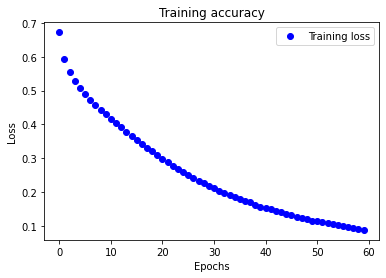

In [30]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
epochs = range(60)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

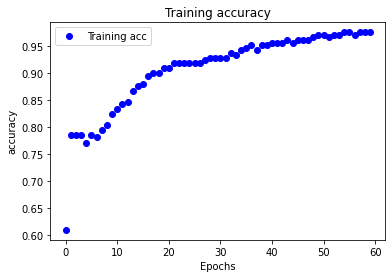

In [31]:
acc_values = history_dict['accuracy'] 
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy') 
plt.legend()
plt.show()